We will use Supervised Learning to predict disease outbreaks based on health data. 


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML tools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Load Data
import pandas as pd
df = pd.read_csv("final.csv")  
print(df.head())

   serial    tempmax    tempmin       temp  feelslikemax  feelslikemin  \
0       0  34.053151  24.478082  28.709863     39.757808     25.317808   
1       1  34.086179  25.694309  29.464228     41.338211     28.140650   
2       2  34.573984  25.417886  29.526829     40.464228     26.560163   
3       3  33.020325  25.080488  28.727642     37.878049     26.193496   
4       4  30.660976  24.230894  26.774797     36.586992     24.263415   

   feelslike        dew   humidity     precip  ...  sealevelpressure  \
0  32.306301  22.971233  73.508219   2.921726  ...       1007.911781   
1  34.423577  23.484553  72.066667   3.783415  ...       1003.533333   
2  33.085366  22.580488  69.424390   3.065854  ...       1005.731707   
3  31.772358  21.752033  69.297561   6.025203  ...       1003.359350   
4  28.943902  24.214634  86.652033  23.336585  ...       1009.995935   

   cloudcover  visibility  solarradiation  solarenergy   uvindex  conditions  \
0   50.747945    3.789863      208.097808 

In [6]:
print(df.columns)

Index(['serial', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'cases'],
      dtype='object')


In [7]:
df = df.dropna()  # Drop rows with missing values
df = df.drop(['snow', 'visibility', 'uvindex'], axis=1) 

In [10]:
#Separate features and label
df['outbreak'] = df['cases'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('outbreak', axis=1)  # Features
y = df['outbreak'] 


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
#Predict on the test set and evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       121

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



c:\Users\Asanda Mthembu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


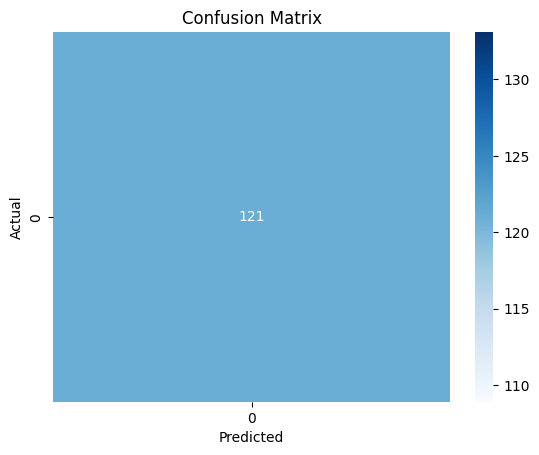

In [16]:
#Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()